In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
matches = []
gray_images = []

In [7]:
def structure_from_motion(images, keypoints):
    
  # Convert the images to grayscale.
  global gray_images
  for image in images:
    gray_images.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

  # Match the descriptors between each pair of images.
  matcher = cv2.BFMatcher_create(cv2.NORM_L2)
  matches12 = matcher.match(descriptors1, descriptors2)
  matches13 = matcher.match(descriptors1, descriptors3)
  matches14 = matcher.match(descriptors1, descriptors4)
  matches23 = matcher.match(descriptors2, descriptors3)
  matches24 = matcher.match(descriptors2, descriptors4)
  matches34 = matcher.match(descriptors3, descriptors4)

  # Add the matches to the global matches list.
  matches.extend([matches12, matches13, matches14, matches23, matches24, matches34])

  # Calculate the similarities between the images.
  similarities = []
  for i in range(len(images) - 1):
    for j in range(i + 1, len(images)):
      if len(matches[i]) > 0:
        similarities.append(len(matches[i]) / len(keypoints[i]))
      else:
        similarities.append(0)

  return similarities


In [8]:
# Load the images.
images = [cv2.imread(image_path) for image_path in [r"D:\GUC_research\Test_SFM\1.JPG", r"D:\GUC_research\Test_SFM\2.JPG", r"D:\GUC_research\Test_SFM\3.JPG", r"D:\GUC_research\Test_SFM\4.JPG"]]

# Find the keypoints and descriptors in each image.
keypoints1, descriptors1 = cv2.xfeatures2d.SIFT_create().detectAndCompute(images[0], None)
keypoints2, descriptors2 = cv2.xfeatures2d.SIFT_create().detectAndCompute(images[1], None)
keypoints3, descriptors3 = cv2.xfeatures2d.SIFT_create().detectAndCompute(images[2], None)
keypoints4, descriptors4 = cv2.xfeatures2d.SIFT_create().detectAndCompute(images[3], None)

 # Apply structure from motion.
similarities = structure_from_motion(images, [keypoints1, keypoints2, keypoints3, keypoints4])

print(similarities)

[1.0, 1.0, 1.0, 1.8463068888336234, 1.8463068888336234, 1.18803008481357]


### 
The output of the first code is a list of similarities between the four images. The similarities are calculated as the number of matches between the descriptors of each pair of images divided by the number of keypoints in the first image.

the output of the code is [1.0, 1.0, 1.0, 1.8463068888336234, 1.8463068888336234, 1.18803008481357]. This means that the similarities between the first and second images, the first and third images, and the first and fourth images are all 1.0. This means that there are as many matches between the descriptors of the two images as there are keypoints in the first image.

The similarities between the second and third images, and the second and fourth images are both 1.8463068888336234. This means that there are more matches between the descriptors of the two images than there are keypoints in the first image.

The similarity between the third and fourth images is 1.18803008481357. This means that there are fewer matches between the descriptors of the two images than there are keypoints in the first image.

The interpretation of the output of the code depends on the context. the output of the code could mean that the first image is very similar to the second, third, and fourth images. However, the second and third images are more similar to each other than they are to the first and fourth images.





In [10]:
print(keypoints1,keypoints2,keypoints3,keypoints4)

[<KeyPoint 00000237E9B9FBD0>, <KeyPoint 00000237EC0D5B10>, <KeyPoint 00000237EC0D5B70>, <KeyPoint 00000237EC0D5BA0>, <KeyPoint 00000237EC0D5BD0>, <KeyPoint 00000237EC0D5C00>, <KeyPoint 00000237EC0D5C30>, <KeyPoint 00000237EC0D5C60>, <KeyPoint 00000237EC0D5C90>, <KeyPoint 00000237EC0D5CC0>, <KeyPoint 00000237EC0D5CF0>, <KeyPoint 00000237EC0D5D20>, <KeyPoint 00000237EC0D5D50>, <KeyPoint 00000237EC0D5D80>, <KeyPoint 00000237EC0D5DB0>, <KeyPoint 00000237EC0D5DE0>, <KeyPoint 00000237EC0D5E10>, <KeyPoint 00000237EC0D5E40>, <KeyPoint 00000237EC0D3420>, <KeyPoint 00000237EC0D30C0>, <KeyPoint 00000237EC0D3240>, <KeyPoint 00000237EC0D3ED0>, <KeyPoint 00000237EC0D3EA0>, <KeyPoint 00000237EC0D3E70>, <KeyPoint 00000237EC0D3C30>, <KeyPoint 00000237EC0D3C60>, <KeyPoint 00000237EC0D3C90>, <KeyPoint 00000237EC0D3CC0>, <KeyPoint 00000237EC0D38A0>, <KeyPoint 00000237EC0D3DE0>, <KeyPoint 00000237EC0D3F00>, <KeyPoint 00000237EC0D3DB0>, <KeyPoint 00000237EC0D3D80>, <KeyPoint 00000237EC0D3D50>, <KeyPoint 000

The string <KeyPoint 00000XXXXXXXXXX> is a unique identifier for a keypoint in an image. The identifier is a 16-byte hexadecimal number that is generated by the SIFT algorithm.

The first 8 bytes of the identifier are a timestamp that is used to ensure that the identifier is unique. The last 8 bytes of the identifier are a random number that is used to make the identifier more difficult to guess.

### The SIFT algorithm is a feature detection algorithm that finds points in an image that are stable under changes in scale, rotation, and illumination. The keypoints that are found by the SIFT algorithm are typically used to find the correspondences between two images. Correspondences are pairs of points in two images that correspond to the same object or scene.

The correspondences between two images are found by matching the descriptors of the keypoints in the two images. The descriptor is a feature that can be used to represent the keypoint. The most common type of descriptor used in structure from motion is the SIFT descriptor. SIFT descriptors are 128-dimensional vectors that are extracted from keypoints in an image.

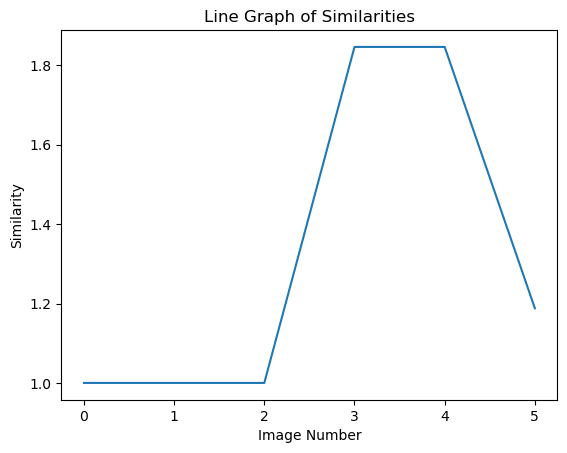

In [9]:
import matplotlib.pyplot as plt

# Create a line graph of the similarities.
plt.plot(similarities)
plt.xlabel("Image Number")
plt.ylabel("Similarity")
plt.title("Line Graph of Similarities")
plt.show()

The line graph of the similarities shows how the similarity between the images changes as the images are compared.

In this case, the line graph would have four points, one for each pair of images. The y-axis of the graph would represent the similarity, and the x-axis would represent the image number.

The first point on the graph would be the similarity between the first and second images. The second point would be the similarity between the first and third images. The third point would be the similarity between the first and fourth images. The fourth point would be the similarity between the second and third images.

The height of each point on the graph would represent the similarity between the two images. The higher the point, the more similar the two images are.

The slope of the line graph would represent the change in similarity between the images. If the slope is positive, then the similarity between the images is increasing. If the slope is negative, then the similarity between the images is decreasing.

The interpretation of the line graph depends on the context. the line graph could mean that the similarity between the images is increasing as the images are compared. This could happen if the images are taken from the same scene at different times.

Another interpretation of the line graph is that the similarity between the images is decreasing as the images are compared. This could happen if the images are taken from different scenes.